## Task1: Load Data

Loading important libraries for using in our analysis

We are going to use NLTK. NLTK is a standard python library that provides a set of diverse algorithms for NLP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
working_directory = os.getcwd()

Loading important libraries for using in our analysis

In [2]:
path = working_directory + '/IMDB Dataset.csv'
df = pd.read_csv(path)

Getting a look on our data by df.head(). It by default shows top 5 entries. For last 5 entries we can use df.tail()

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Task2: Preprocess Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


It shows that there are 50,000 objects and there is not any null entry

Text(0.5, 1.0, 'Sentiment distribution')

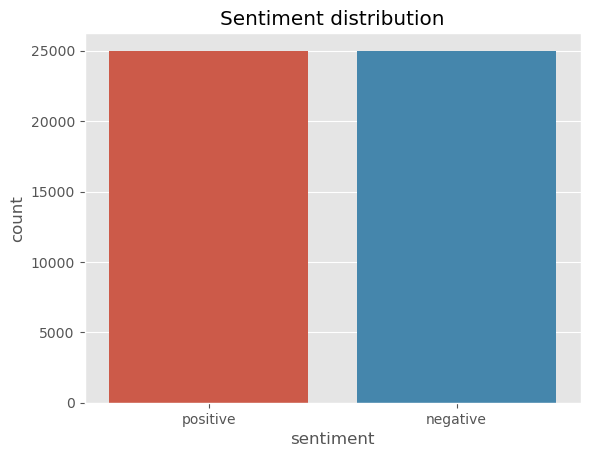

In [5]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

The plot shows the number of positive sentiments

In [6]:
def generate_word_cloud(dataframe_df,column_name,img_file=None,background_color="black",max_words=2000):
    """ This function generates word cloud
    
    Args:
        dataframe: the datafram object which contains column whose word cloud is to be generated
        column_name: the name of the column in dataframw whose cloud is to be generated
        
    Returns:
        None
    """
    #convert the column specified by column_name in dataset_df(dataframe) to list
    sentences_list = dataframe_df[column_name].tolist()
    
    #convert a list to sentence
    #sentences_single_string = " ".join(sentences_list)
    sentences_single_string = " ".join(map(str,sentences_list))
    
    #plot word cloud
    plt.figure(figsize=(15,15))
    
    img_mask = None
    
    if img_file != None:
        img_mask = np.array(Image.open(img_file))

    wc = WordCloud(mask=img_mask,
                   max_words=max_words,
                   background_color=background_color)        
        
    plt.imshow(wc.generate(sentences_single_string),interpolation="bilinear")
    plt.title("Word Cloud For " +  column_name)
    plt.show()

The above funtion plots a word cloud. Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

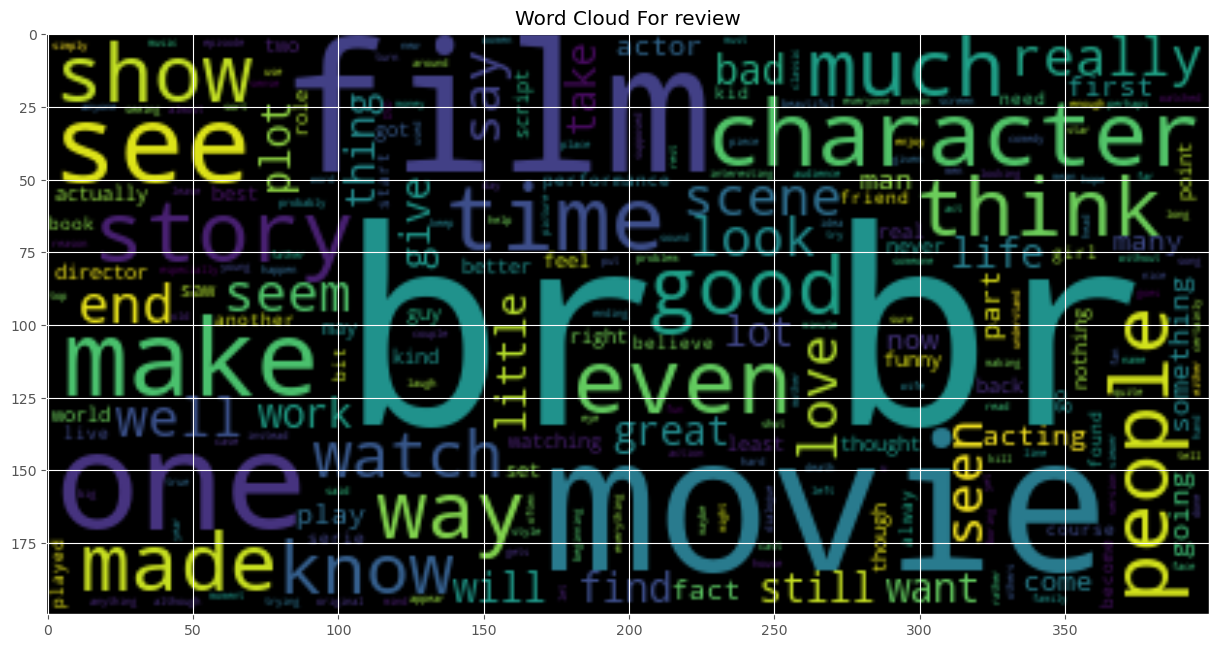

Total Time Taken: 15828.307390213013 ms


In [7]:
import time
tic= time.time()
generate_word_cloud(df,"review",background_color="black")
toc = time.time()
diff = 1000*(toc - tic)
print("Total Time Taken: " + str(diff) + " ms")

A common observation which can be taken from the word cloud representation is that there are lot of html tags in the tags so we need to eliminate them.

## Task 3: Text Preprocessing

Here we are downloading the list the stop words.A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 

In [8]:
#import required libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords #for stopwords
from nltk.stem import PorterStemmer #for word stemming
from nltk.tokenize import TweetTokenizer #for toekinizing string to list of words
import string #for punctuation
import re #for regular expression
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tribhuvan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def process_string(text):
    """This function returns a processed list of words from the given text
    
    This function removes html elements and urls using regular expression, then
    converts string to list of workds, them find the stem of words in the list of words and
    finally removes stopwords and punctuation marks from list of words.
    
    Args:
        text(string): The text from which hrml elements, urls, stopwords, punctuation are removed and stemmed
        
    Returns:
        clean_text(string): A text formed after text preprocessing.
    """
    
    #remove any urls from the text
    text = re.sub(r"https:\/\/.*[\r\n]*","",text)
    
    #remove any urls starting from www. in the text
    text = re.sub(r"www\.\w*\.\w\w\w","",text)
    
    #remove any html elements from the text
    text = re.sub(r"<[\w]*[\s]*/>","",text)
    
    #remove prediods  marks
    text = re.sub(r"[\.]*","",text)
    
    #initilze tweet tokenizer 
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    
    #tokenize text
    text_tokens = tokenizer.tokenize(text)
    
    #intizlize porter stemmer
    porter_stemmer = PorterStemmer()
    
    #get english stopwords
    english_stopwords = stopwords.words("english")
    
    cleaned_text_tokens = [] # a list to hold cleaned text tokens
    
    for word in text_tokens:
        if((word not in english_stopwords) and #remove stopwords
            (word not in string.punctuation)): #remove punctuation marks
                
                stemmed_word = porter_stemmer.stem(word) #get stem of the current word
                cleaned_text_tokens.append(stemmed_word) #appened stemmed word to list of cleaned list
    
    #combine list into single string
    clean_text = " ".join(cleaned_text_tokens)
    
    return clean_text

The above written function removes all the html tags, stopwords, punctuation marks (basically cleans the text.

In [11]:
df["review"].iloc[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

The above string shown is unprocessed, now we will process it with the help of the function and will see the result

In [12]:
process_string(df["review"].iloc[0])

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

Now the string has been processed and all the unwanted characters have been removed

#### clearly this cleaned review is free of html tags as well now. Lets apply this new text cleaning method to all 50k reviews

In [13]:
df["review"] = df["review"].apply(process_string)

In [14]:
#save processed reviews for future use
#save file to csv
df.to_csv("IMDB cleaned Dataset.csv")

Here we applied the function to all the entries in our data and we created a new dataset file which contains all the cleaned strings

In [15]:
df = pd.read_csv("IMDB cleaned Dataset.csv")


In [16]:
df.head()

,Unnamed: 0,review,sentiment
0,0,one review mention watch 1 oz episod hook righ...,positive
1,1,wonder littl product film techniqu unassum old...,positive
2,2,thought wonder way spend time hot summer weeke...,positive
3,3,basic there' famili littl boy jake think there...,negative
4,4,petter mattei' love time money visual stun fil...,positive


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  50000 non-null  int64 
 1   review      50000 non-null  object
 2   sentiment   50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [19]:
df["review"].iloc[0]

"one review mention watch 1 oz episod hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard who'll sold nickel inmat who'll kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort viewingtha

#### Lets look at reviews after they have been cleaned

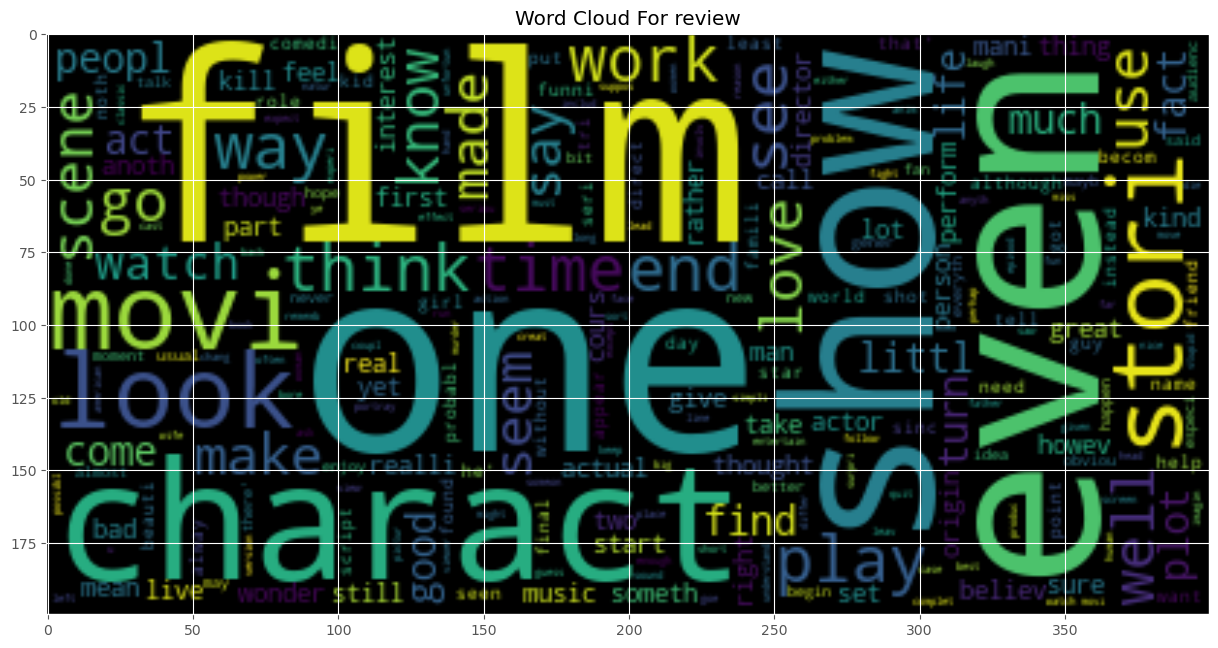

Total Time Taken: 19.137927293777466 ms


In [20]:
tic = time.time()
generate_word_cloud(df,"review",background_color="black")
toc = time.time()
diff = toc - tic
print("Total Time Taken: " + str(diff) + " ms")


#### Clearly the new text preprocessing method resulted in much more cleaner reviews, the prominent "br" tag that has massive occurence is not visible anymore. Thanks to regular epression. Lets further examine these word could by looking into positive only and negative only reviews

#### The review have been saved and loaded.

## Task 4: Split Data into Train and Test Set

#### The data set has to split into train(80%) / valid(10%) / test(10%) set. Train set will be used to train machine learning models and validation set will be used to tune the machine learning models and the test will be used to evaluate the performance of ml models.

#### There are two classes ("positive" and "negative") in the dataset. A blanced dataset containing equal number of samples from both classes.

In [21]:
#scikit learn library that splits data
from sklearn.model_selection import train_test_split

In [24]:
#first split data into train and test set
review_train, review_test, labels_train, labels_test = train_test_split(df["review"], df["sentiment"], test_size=0.1, random_state=0)


In [25]:
#second split train set into train and valid set
review_train, review_valid, labels_train, labels_valid = train_test_split(review_train, labels_train, test_size=0.1111, random_state=0)

In [26]:
df.head()

,Unnamed: 0,review,sentiment
0,0,one review mention watch 1 oz episod hook righ...,positive
1,1,wonder littl product film techniqu unassum old...,positive
2,2,thought wonder way spend time hot summer weeke...,positive
3,3,basic there' famili littl boy jake think there...,negative
4,4,petter mattei' love time money visual stun fil...,positive


In [27]:
#see the sample count in all sets
print("Train Set: ")
print("Positive Samples count: " + str(len(review_train[labels_train=="positive"] )  ) )
print("Negative Samples count: " + str(len(review_train[labels_train=="negative"] )  ) )
print("Total Samples count: " + str(len(review_train)  ) )


Train Set: 
Positive Samples count: 20059
Negative Samples count: 19941
Total Samples count: 40000


In [28]:
#see the sample count in all sets
print("Valid Set: ")
print("Positive Samples count: " + str(len(review_valid[labels_valid=="positive"] )  ) )
print("Negative Samples count: " + str(len(review_valid[labels_valid=="negative"] )  ) )
print("Total Samples count: " + str(len(review_valid)  ) )

Valid Set: 
Positive Samples count: 2494
Negative Samples count: 2506
Total Samples count: 5000


In [29]:
#see the sample count in all sets
print("Test Set: ")
print("Positive Samples count: " + str(len(review_test[labels_test =="positive"] )  ) )
print("Negative Samples count: " + str(len(review_test[labels_test =="negative"] )  ) )
print("Total Samples count: " + str(len(review_test) ))

Test Set: 
Positive Samples count: 2447
Negative Samples count: 2553
Total Samples count: 5000


As the train_test_split() performs the split and returns four sequences (in this case NumPy arrays). Hence, we will convert these numpy matrix to pandas

In [32]:
#convert train matrix from numpy matrix to pandas
review_train_df = pd.DataFrame()
review_train_df["review"] = review_train
review_train_df["sentiment"] = labels_train
review_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 13902 to 2487
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  object
dtypes: object(2)
memory usage: 937.5+ KB


In [33]:

#convert valid matrix from numpy matrix to pandas
review_valid_df = pd.DataFrame()
review_valid_df["review"] = review_valid
review_valid_df["sentiment"] = labels_valid
review_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 24777 to 20223
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [34]:
#convert test matrix from numpy matrix to pandas
review_test_df = pd.DataFrame()
review_test_df["review"] = review_test
review_test_df["sentiment"] = labels_test
review_valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 24777 to 20223
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 117.2+ KB


In [35]:
#make sure the reviews are in string format
review_train_df["review"] = review_train_df["review"].apply(lambda row_text: str(row_text))
review_valid_df["review"] = review_valid_df["review"].apply(lambda row_text: str(row_text))
review_test_df["review"] = review_test_df["review"].apply(lambda row_text: str(row_text))

## Task 5: Generate Features from reviews And Numerical labels for Sentiment

CountVectorizer is a great tool in scikit library. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. 

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() #instantiate vectorizer
feature_matrix_train = vectorizer.fit_transform(review_train_df["review"].tolist())
feature_matrix_train.shape


(40000, 118478)

In [37]:
feature_matrix_valid = vectorizer.transform(review_valid_df["review"].tolist())
feature_matrix_valid.shape
feature_matrix_test = vectorizer.transform(review_test_df["review"].tolist())
feature_matrix_test.shape

(5000, 118478)

#### The sentiment for each review is labelled as positive or negative. Machine Learning Models require Numberical values so lets convert these labels to numerical labels

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated

In [38]:
#import label encoder
from sklearn import preprocessing #library that alllows label encoding
label_encoder = preprocessing.LabelEncoder() #instantiate label encoder
label_matrix_train = label_encoder.fit_transform(review_train_df["sentiment"]) #encoded
label_matrix_train.shape

(40000,)

In [39]:

label_matrix_valid = label_encoder.fit_transform(review_valid_df["sentiment"]) #encoded
label_matrix_valid.shape


(5000,)

In [40]:
label_matrix_test = label_encoder.fit_transform(review_test_df["sentiment"]) #encoded
label_matrix_test.shape

(5000,)

#### Term-Doument Matrix is a poular matrix design in NLP. Lets create a term document matrix

A document-term matrix or term-document matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. There are various schemes for determining the value that each entry in the matrix should take. One such scheme is tf-idf. They are useful in the field of natural language processing

In [41]:
dt_train_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_train, columns = vectorizer.get_feature_names())
dt_valid_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_valid, columns = vectorizer.get_feature_names())
dt_test_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_test, columns = vectorizer.get_feature_names())
#term document term matrix for trainning set
dt_train_df.iloc[500:505,500:505].transpose()


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,500,501,502,503,504
1894loie,0,0,0,0,0
1895,0,0,0,0,0
1895the,0,0,0,0,0
1896,0,0,0,0,0
1896jeff,0,0,0,0,0


In [42]:
#term document term matrix for trainning set
dt_train_df.iloc[10000:10005,10000:10005].transpose()

,10000,10001,10002,10003,10004
banjo,0,0,0,0,0
bank,0,0,0,0,0
bankabl,0,0,0,0,0
bankbarbara,0,0,0,0,0
bankcrupci,0,0,0,0,0


In [43]:
#term document term matrix for trainning set
dt_train_df.iloc[20000:20005,20000:20005].transpose()

,20000,20001,20002,20003,20004
christmasth,0,0,0,0,0
christmasthi,0,0,0,0,0
christmastim,0,0,0,0,0
christmastoss,0,0,0,0,0
christmastreeshop,0,0,0,0,0


In [44]:
#term document term matrix for trainning set
dt_train_df.iloc[3000:34005,34000:34005].transpose()

,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,...,33995,33996,33997,33998,33999,34000,34001,34002,34003,34004
entertainingg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entertaininggen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entertaininggood,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entertainingh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entertaininghav,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Lets visualized some of the top words used in movie reviews

In [45]:
dt_train_df.iloc[0]


00             0
000            0
0001           0
00015          0
001            0
              ..
üzümcü         0
ýs             0
þorleifsson    0
þór            0
četvorka       0
Name: 0, Length: 118478, dtype: Sparse[int64, 0]

#### Here we are going to create a pipeline to get the frequency of the top words used in the reviews.

In [46]:
def plot_top_words(document_term_df,upper_threshold=10000,lower_threshold=10,count=20):
    
    #for time purposes
    tic = time.time()
    
    top_word_freq = {}
    #build frequency dictionary
    for col in document_term_df.columns:
        
        col_count = document_term_df[col].to_numpy().max()
        
        if lower_threshold < col_count < upper_threshold:
            top_word_freq[col] = col_count
            
        if len(top_word_freq) > count:
            break

    #print thresholds
    print("Upper Limit: " + str(upper_threshold))
    print("Lower Limit: " + str(lower_threshold))
    print("Requested Count: " + str(count))
    
    plt.figure(figsize=(20,10))
    
    y_vals = [top_word_freq[word] for word in top_word_freq.keys()]
    
    anotates = list(top_word_freq.keys())
    
    x_vals = [i for i in range(0,len(y_vals))]
    
    plt.scatter(x_vals,y_vals)

    plt.title("Top Word Counts")
    plt.xlabel("Top Words")
    plt.ylabel("Word Frequency")
    
    for y,a,x in zip(y_vals,anotates,x_vals):
        plt.annotate(a, #anotate
                     (x,y), #for this data point 
                    textcoords="offset points", #how to position text
                    xytext=(0,10), #distance from text to points (x,y)
                    ha="center") #horizontal alignment can beleft, right or center 
    
    #for time purposes
    toc = time.time()
    tictoc = (toc-tic)*1000
    print("Time Taken: " + str(tictoc) + " ms")

#### Lets Look at the top words used in training set

Upper Limit: 10000
Lower Limit: 20
Requested Count: 20
Time Taken: 1902.8277397155762 ms


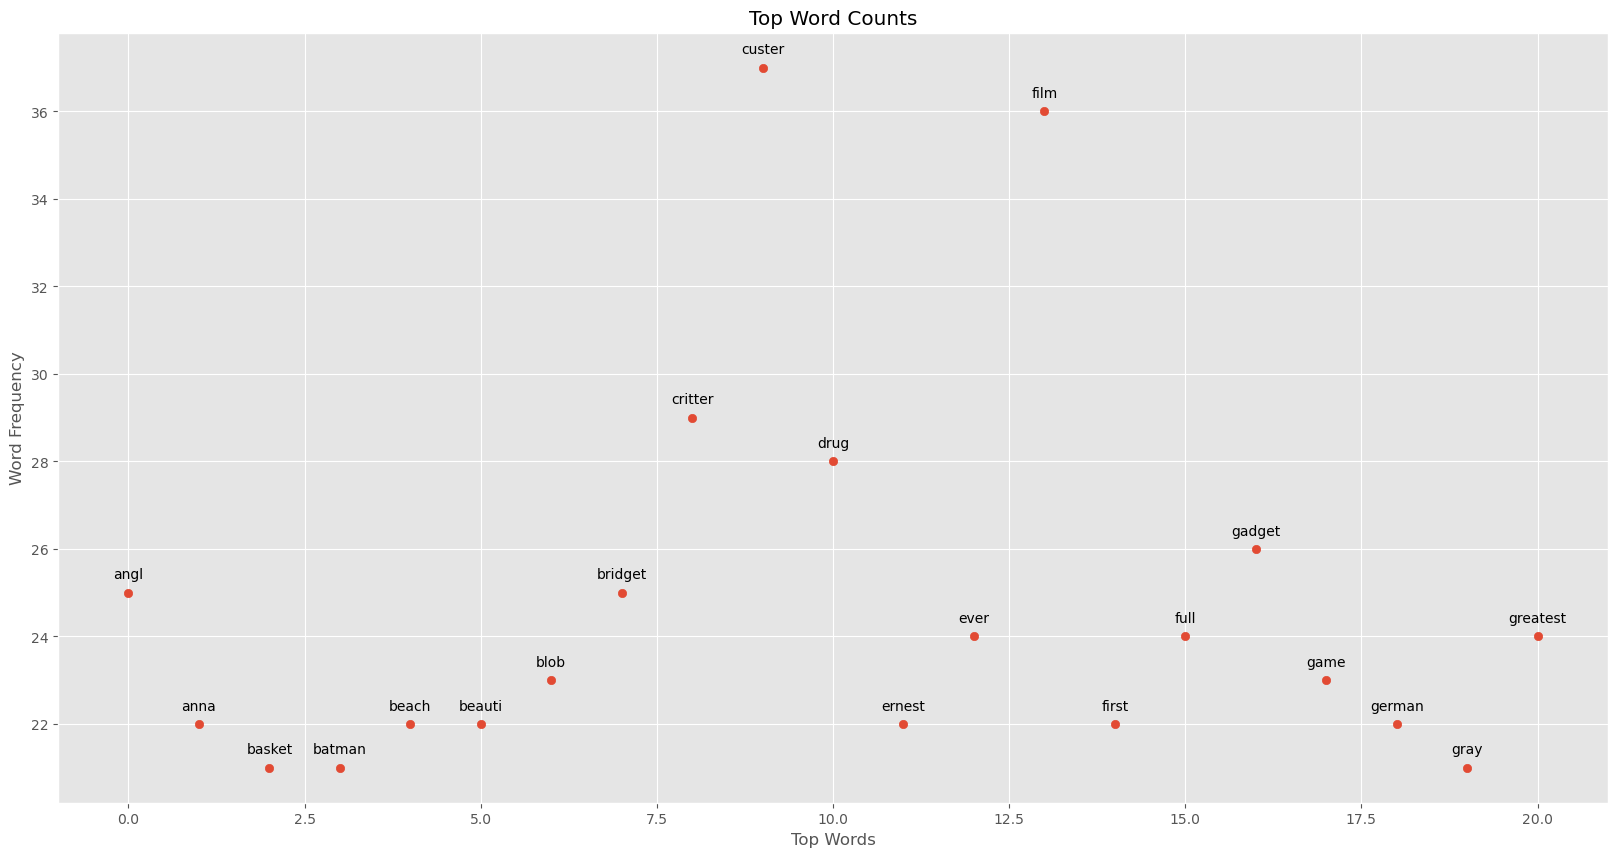

In [47]:
plot_top_words(dt_train_df,upper_threshold=10000,lower_threshold=20,count=20)

#### Lets Look at the top words used in training set whose sentiment is labelled as negative

Upper Limit: 10000
Lower Limit: 10
Requested Count: 30
Time Taken: 268.68629455566406 ms


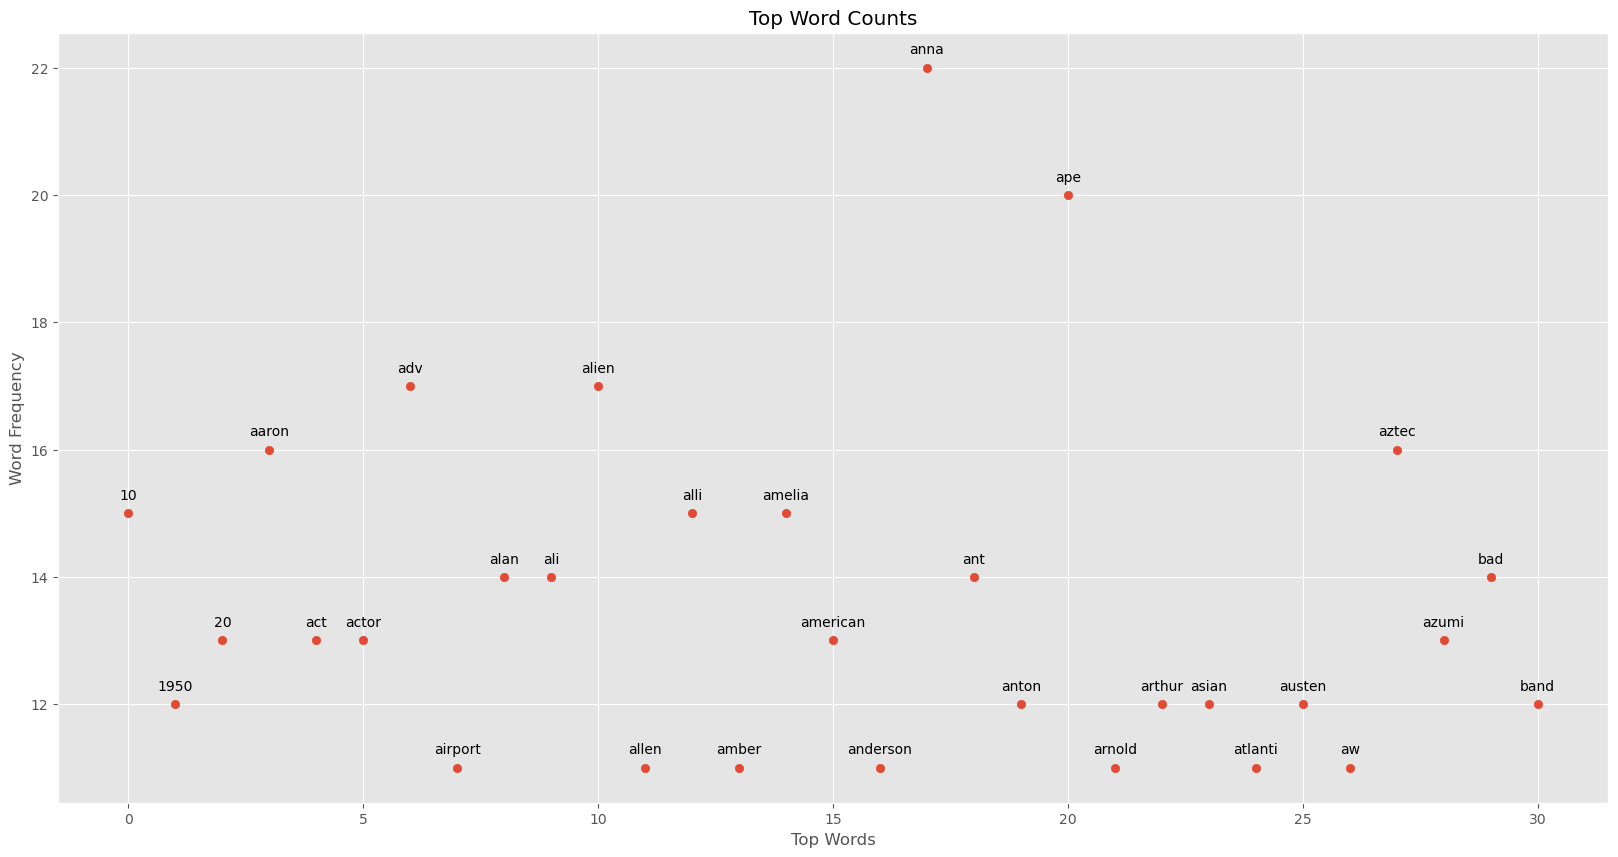

In [48]:
plot_top_words(dt_train_df[label_matrix_train==0],upper_threshold=10000,lower_threshold=10,count=30)

#### Lets Look at the top words used in trainning set whose sentiment is labelled as negative

Upper Limit: 10000
Lower Limit: 10
Requested Count: 30
Time Taken: 159.7268581390381 ms


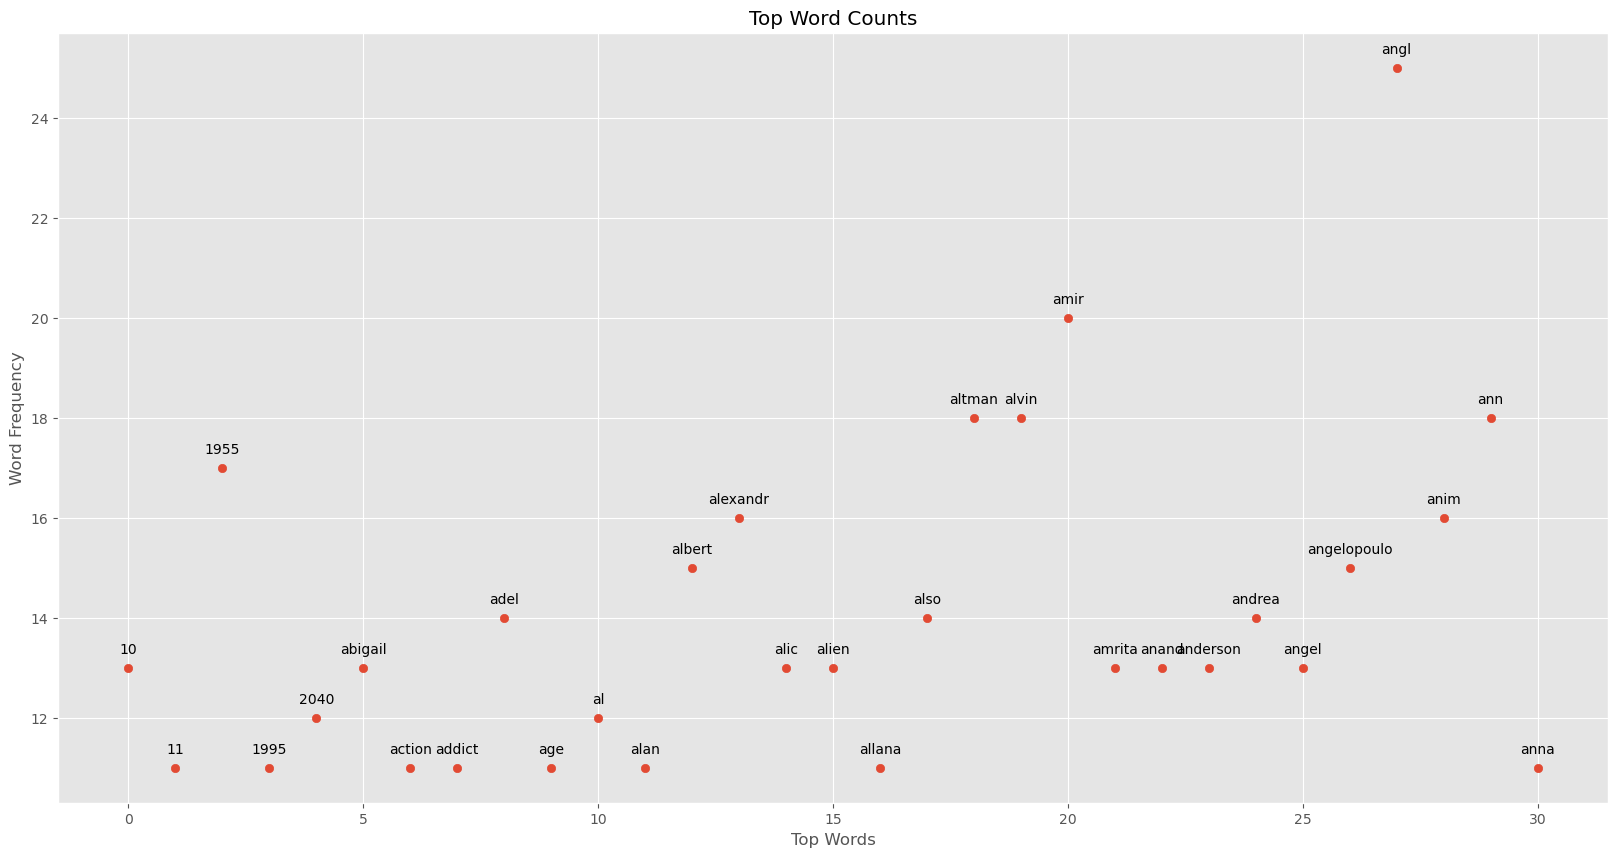

In [49]:
plot_top_words(dt_train_df[label_matrix_train==1],upper_threshold=10000,lower_threshold=10,count=30)

## Task 7: Re-weighing the document term matrix using TF-IDF Scheme

#### TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify words in a set of documents. We generally compute a score for each word to signify its importance in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf_vectorizer = TfidfVectorizer()


In [52]:
feature_matrix_train = tfidf_vectorizer.fit_transform(review_train_df["review"].tolist())
feature_matrix_train.shape

(40000, 118478)

In [53]:
feature_matrix_valid = tfidf_vectorizer.transform(review_valid_df["review"].tolist())
feature_matrix_valid.shape


(5000, 118478)

In [54]:
dt_train_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_train, columns = vectorizer.get_feature_names())
dt_valid_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_valid, columns = vectorizer.get_feature_names())
dt_test_df = pd.DataFrame.sparse.from_spmatrix(data = feature_matrix_test, columns = vectorizer.get_feature_names())

#term document term matrix for trainning set with TF-IDF reweighing scheme
dt_train_df.iloc[500:505,500:505].transpose()

/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,500,501,502,503,504
1894loie,0.0,0.0,0.0,0.0,0.0
1895,0.0,0.0,0.0,0.0,0.0
1895the,0.0,0.0,0.0,0.0,0.0
1896,0.0,0.0,0.0,0.0,0.0
1896jeff,0.0,0.0,0.0,0.0,0.0


In [55]:
#term document term matrix for trainning set with TF-IDF reweighing scheme
dt_train_df.iloc[10000:10005,10000:10005].transpose()


,10000,10001,10002,10003,10004
banjo,0.0,0.0,0.0,0.0,0.0
bank,0.0,0.0,0.0,0.0,0.0
bankabl,0.0,0.0,0.0,0.0,0.0
bankbarbara,0.0,0.0,0.0,0.0,0.0
bankcrupci,0.0,0.0,0.0,0.0,0.0


In [56]:
#term document term matrix for trainning set with TF-IDF reweighing scheme
dt_train_df.iloc[20000:20005,20000:20005].transpose()


,20000,20001,20002,20003,20004
christmasth,0.0,0.0,0.0,0.0,0.0
christmasthi,0.0,0.0,0.0,0.0,0.0
christmastim,0.0,0.0,0.0,0.0,0.0
christmastoss,0.0,0.0,0.0,0.0,0.0
christmastreeshop,0.0,0.0,0.0,0.0,0.0


In [57]:
#term document term matrix for trainning set with TF-IDF reweighing scheme
dt_train_df.iloc[3000:34005,34000:34005].transpose()


,3000,3001,3002,3003,3004,3005,3006,3007,3008,3009,...,33995,33996,33997,33998,33999,34000,34001,34002,34003,34004
entertainingg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertaininggen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertaininggood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertainingh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entertaininghav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now time to train Machine Learning Models

## Task 8: Train and Test Machine Learning Models

Now we are going to train various models and we will test their accuracy

### Classifer 1:- Naive Bayes

In [58]:
tic = time.time()
#Train Naive Bayes Model
#More Details: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import BernoulliNB #Gaussain assume fatures from normal distribution, Bernouli for boolean, multionomial for discreeet
model_nb = BernoulliNB()
model_nb.fit(feature_matrix_train, label_matrix_train)
toc = time.time()
y_pred_nb = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_nb.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_nb.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Naive Bayes Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Naive Bayes Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Naive Bayes Model, Accuracy (Train Set) :  0.90355
Naive Bayes Model, Accuracy (Valid Set) :  0.85
Time Taken: 88.39988708496094 ms


### Classifer 2:- Descision Tree

In [59]:
tic = time.time()
#Train Descision Trees Model
#More Details: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier
maximum_tree_depth= 15
model_dt = DecisionTreeClassifier(max_depth=maximum_tree_depth)
model_dt.fit(feature_matrix_train,label_matrix_train)
toc = time.time()
y_pred_dt = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_dt.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_dt.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Descision Tree Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Descision Tree Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Descision Tree Model, Accuracy (Train Set) :  0.8142
Descision Tree Model, Accuracy (Valid Set) :  0.7388
Time Taken: 6304.072141647339 ms


### Classifer 3:- K Nearest Neighbor

In [60]:
tic = time.time()
#Train K Nearest Negihbor Model
#More Details: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
#MOre Details: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier
number_of_neigbors = 3
minkowski_power = 2 # Manhattan Distance = 1, Euclidean Distance = 2
model_knn = KNeighborsClassifier(n_neighbors=number_of_neigbors, p =minkowski_power)
model_knn.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_knn = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_knn.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_knn.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("K Nearest Neighbors Model, Accuracy (Train Set) : ", accuracy_train_set)
print("K Nearest Neighbors Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")


K Nearest Neighbors Model, Accuracy (Train Set) :  0.88665
K Nearest Neighbors Model, Accuracy (Valid Set) :  0.774
Time Taken: 6.776094436645508 ms


### Classifer 4:- Logistic Regression

In [61]:
tic = time.time()
#Train Support Vector Machine Model
#More Details: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
from sklearn.svm import LinearSVC
l2_norm = 2.1
l2_norm_inverse = 1/l2_norm
maximum_iterations=4000 #maximum number of iterations
model_svm = LinearSVC(C=l2_norm_inverse,max_iter=maximum_iterations) #create support vector machine model
model_svm.fit(feature_matrix_train,  label_matrix_train)
toc = time.time()
y_pred_svm = model_nb.predict(feature_matrix_valid)
accuracy_train_set = model_svm.score(feature_matrix_train, label_matrix_train)  #get accuracy on train set
accuracy_valid_set = model_svm.score(feature_matrix_valid, label_matrix_valid)  #get accuracy on valid set
print("Support Vector Machine Model, Accuracy (Train Set) : ", accuracy_train_set)
print("Support Vector Machine Model, Accuracy (Valid Set) : ", accuracy_valid_set)
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Support Vector Machine Model, Accuracy (Train Set) :  0.9676
Support Vector Machine Model, Accuracy (Valid Set) :  0.8996
Time Taken: 302.5050163269043 ms


## Task 9: Plot Evaluation Metrics for Machine Learning Models

In [62]:
from sklearn.model_selection import train_test_split #split data into train,test sets
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve,  plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from matplotlib import pyplot as plt


In [63]:
#make a list of classifers
ml_models_list = [model_nb, #Naive Bayes
                  model_dt, #Descision Trees
                 model_knn, #K nearest neighbors
                 model_svm, #Support Vector Machine
                 ]

In [64]:
tic = time.time()
for model in ml_models_list:
    accuracy = model.score(feature_matrix_test, label_matrix_test)  #get accuracy
    y_pred = model.predict(feature_matrix_test) #get predictions
    model_name = type(model).__name__
    print("Accuracy("+ model_name + "): ", accuracy.round(4)) #display accuracy
    print("Precision("+ model_name + "): ", precision_score(label_matrix_test,y_pred).round(4)) #display precision
    print("Recall("+ model_name + "): ",recall_score(label_matrix_test,y_pred).round(4)) #display recall
    print("F1_Score("+ model_name + "): ",f1_score(label_matrix_test,y_pred,average='macro').round(4)) #display f1_score
    print("\n")
toc = time.time()
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

Accuracy(BernoulliNB):  0.851
Precision(BernoulliNB):  0.8594
Recall(BernoulliNB):  0.8316
F1_Score(BernoulliNB):  0.8508


Accuracy(DecisionTreeClassifier):  0.6828
Precision(DecisionTreeClassifier):  0.6367
Recall(DecisionTreeClassifier):  0.8194
F1_Score(DecisionTreeClassifier):  0.6782


Accuracy(KNeighborsClassifier):  0.7484
Precision(KNeighborsClassifier):  0.7336
Recall(KNeighborsClassifier):  0.763
F1_Score(KNeighborsClassifier):  0.7484


Accuracy(LinearSVC):  0.8756
Precision(LinearSVC):  0.8432
Recall(LinearSVC):  0.9162
F1_Score(LinearSVC):  0.8755


Time Taken: 20782.145023345947 ms


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprec

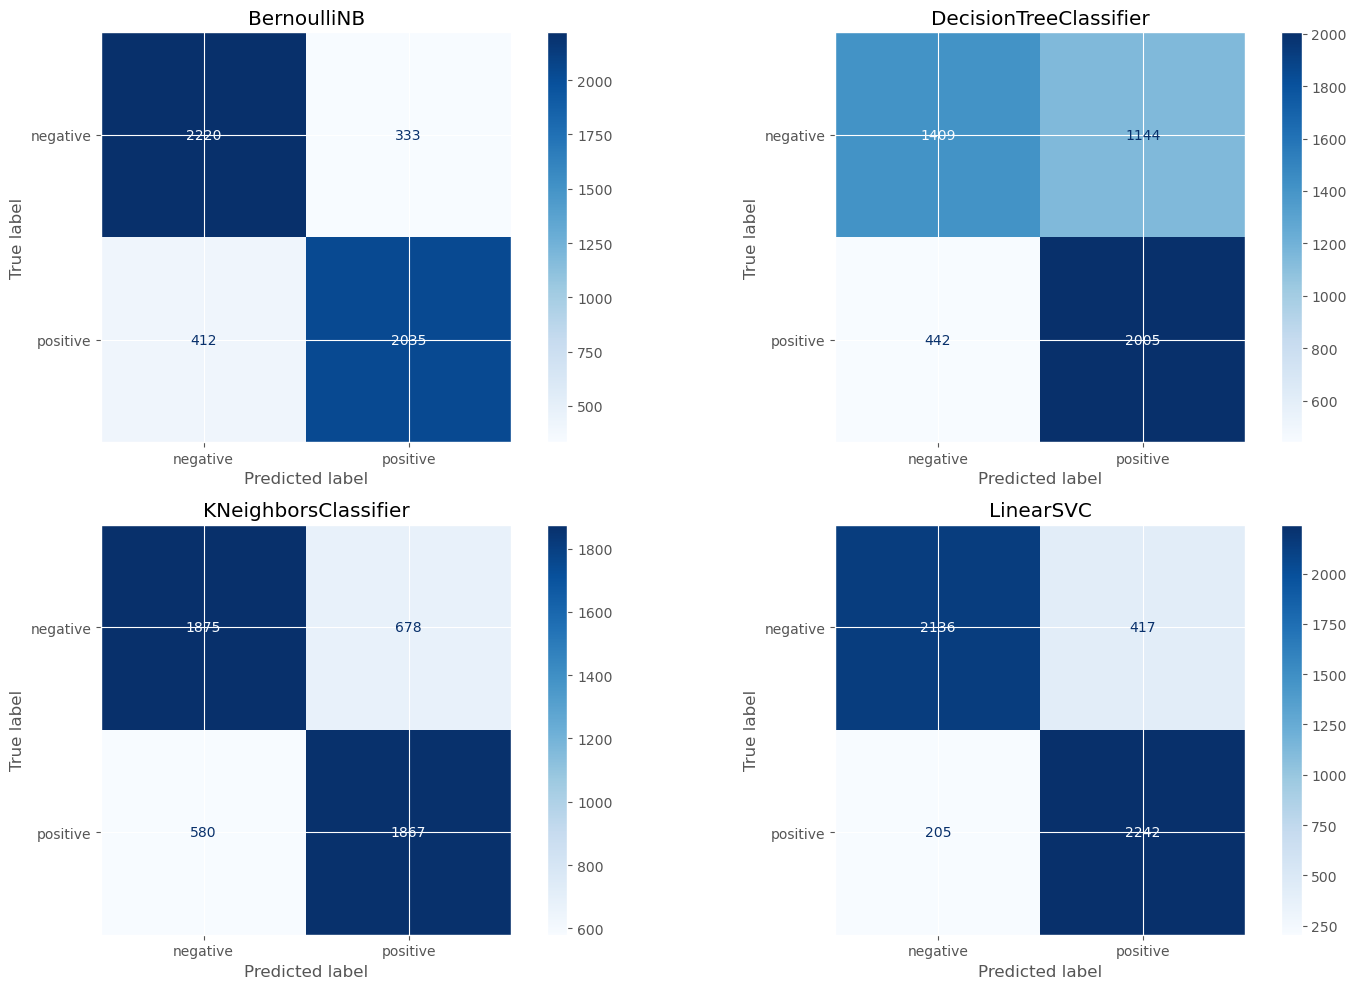

Time Taken: 10818.633317947388 ms


In [65]:
tic = time.time()
#Plot Confusion Matrix For all Models
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for model,ax in zip(ml_models_list, axes.flatten()):
    
    plot_confusion_matrix(model, 
                          feature_matrix_test, 
                          label_matrix_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=["negative","positive"])
    
    ax.title.set_text(type(model).__name__)
plt.tight_layout()  
plt.show()
toc = time.time()
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecate

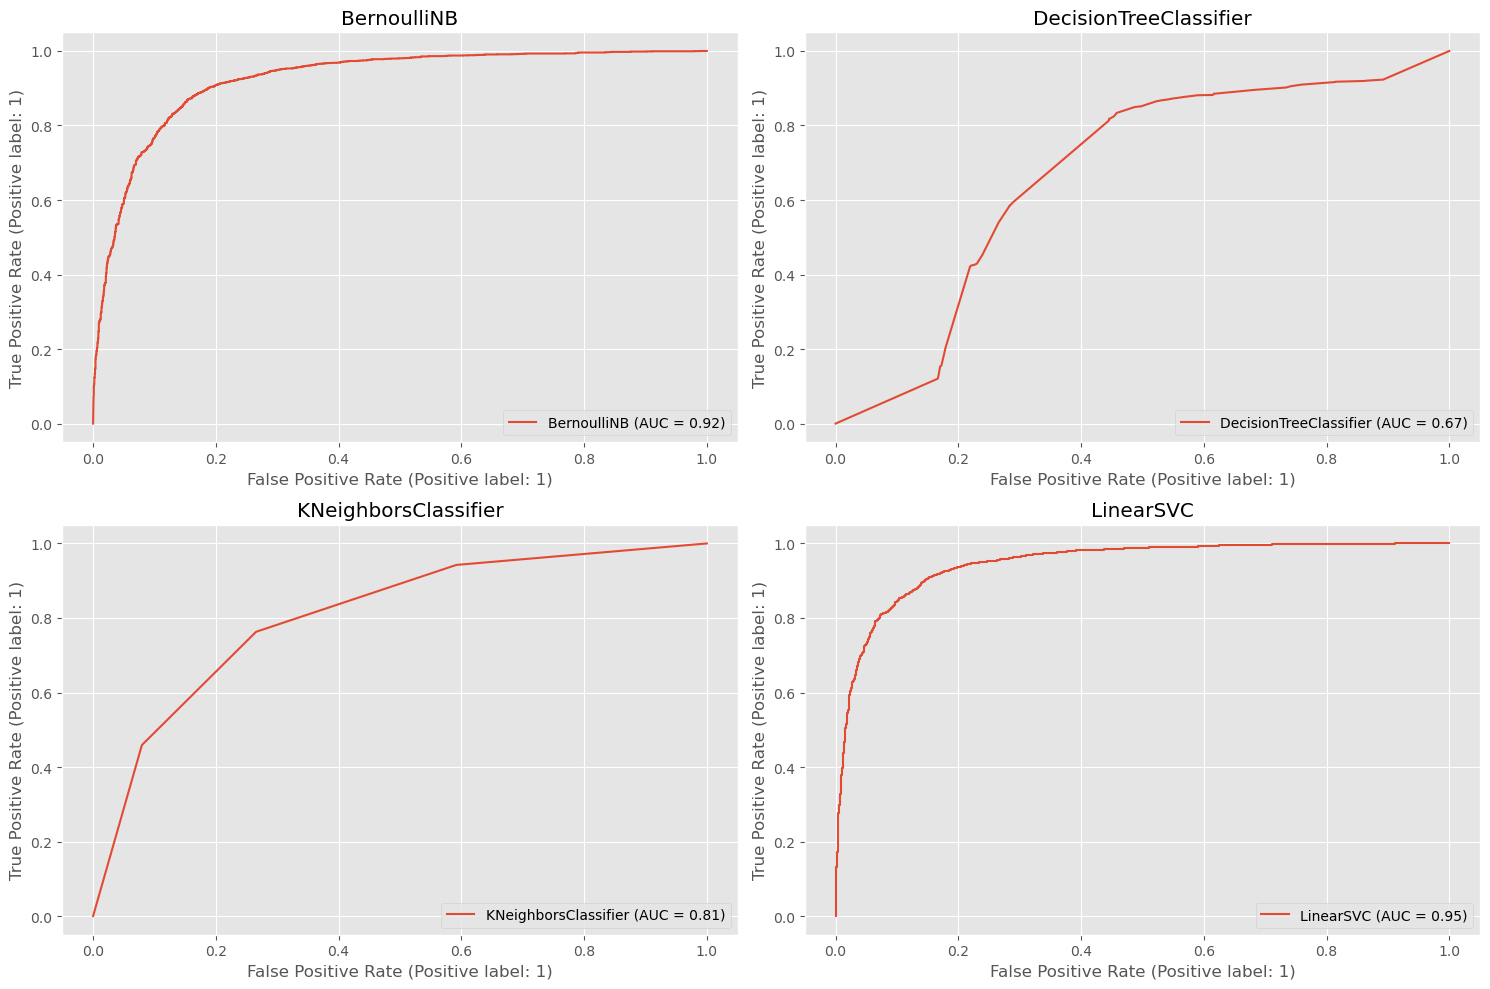

Time Taken: 10598.469972610474 ms


In [66]:
tic = time.time()
#Plot ROC Curve For all Models
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for model, ax in zip(ml_models_list,axes.flatten()):
    
    plot_roc_curve(model,feature_matrix_test,label_matrix_test,ax=ax)
    
    ax.title.set_text(type(model).__name__)

plt.tight_layout()  
plt.show()
toc = time.time()
print("Time Taken: " + str(((toc-tic)*1000)) + " ms")

| | Algorithm  | Accuracy(Test Set)    | Precision(Test Set)  | Recall(Test Set)   | F1_Score(Test Set)   |
|---:|:-------------|:-----------|:------|:------|:------|
| 1 | Naive Bayes  | 0.8510       | 0.8594   | 0.8316    | 0.8508    |
| 2 | Descision Trees  | 0.7276    | 0.6827   | 0.8284     | 0.7257     |
| 2 | K Nearest Neighbors  | 0.7696    | 0.7281   | 0.8447     | 0.7688     |
| 4 | Logistic Regression | 0.8876    | 0.8756   | 0.8978     | 0.8876     |